# 8. Orthogonality

1. [Projection](#1.-Projection)
1. [Rank-k Approximation](#2.-Rank-k-Approximation)
1. [Orthonormality](#3.-Orthonormality)
1. [QR-Factorization](#4.-QR-Factorization)
1. [Singular Value Decomposition](#5.-Singular-Value-Decomposition)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Projection $a(a^Ta)^{-1}a^Tb$

The vector $b$ can be projected onto the span of vector $a$. 

- $b=z+w$
- Where $z = \chi a$
- We choose $w \perp a$, so $a^Tw=0$
- That gives us $a^T(b-z)=0$
- Equals $a^T(b-\chi a) = a^Tb - \chi a^Ta=0$
- What we get is something that looks like the normal equation, but for only one column $a^Ta\chi=a^Tb$
- We can solve $\chi=a^Tb/a^Ta=(a^Ta)^{-1}a^Tb$
- Finally, we know how to scale $a$ so that it reaches the point where $b$ would be projected: $z = a^Tb/a^Taa = aa^Tb/a^Ta=a(a^Ta)^{-1}a^Tb$

In [2]:
a, b = np.matrix("2.5; 1.5"), np.matrix("5; -1")

def projection(A):
    """Returns projection matrix that can be multiplied with any b
    to get the projection of b onto C(A)"""
    return A @ (A.T @ A).I @ A.T

z = projection(a) @ b
print(z)

[[3.23529412]
 [1.94117647]]


Let's plot the following:
- $a$, the vector that has to be scaled to the projection of $b$
- $b$ which consists of $z$ and $w$

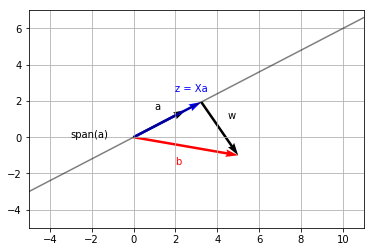

In [3]:
a, b, w, z = [np.array([x, y]) 
              for x, y 
              in [[2.5, 1.5], 
                  [5, -1], 
                  [1.76470588, -2.94117647],
                  [3.23529412, 1.94117647]]]

span_a = ((x, (lambda x: x * a[1]/a[0])(x)) for x in np.linspace(-5, 11, 2))

plt.quiver([0], [0], *zip(*[a, b, z]), angles = 'xy', scale_units = 'xy', scale = 1, color=['black', 'r', 'b'])
plt.quiver(*zip(z), *zip(w), angles = 'xy', scale_units = 'xy', scale = 1)
plt.plot(*zip(*span_a), color="black", alpha=0.5)
plt.text(2, -1.5, "b", color="r")
plt.text(2, 2.5, "z = Xa", color="b")
plt.text(-3, 0, "span(a)")
plt.text(4.5, 1, "w")
plt.text(1, 1.5, "a")

plt.xlim(-5, 11)
plt.ylim(-5, 7)
plt.grid()

Given vectors $a, b \in \mathbb{R}^m$, then:
- $a(a^Ta)^{-1}a^T$ is the matrix that projects any $b$ onto the $span(\{a\})=\mathcal{C}((a))$.
- $I-a(a^Ta)^{-1}a^T$ is the matrix that projects any $b$ onto the $span(\{a\})^\perp=\mathcal{N}((a^T))$.

Let $a=
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$ and $p_a(x), P_a^\perp(x)$ be the projection of $x$ onto $span(\{a\}), span(\{a\})^\perp$, respectively.

What is the projections of $x = 
\begin{pmatrix}
4 \\
2
\end{pmatrix}
$?

In [4]:
# We've already defined the projection(A) function

def projection_perp(A):
    """Returns projection matrix that can be multiplied with any b
    to get the projection of b onto N(A^T)"""
    return np.identity(len(A)) - projection(A)

In [5]:
x = np.matrix("4; 2")
a = np.matrix("1; 0")

print(projection(a) @ x, "<4, 2> onto C((a))")
print(projection_perp(a) @ x, "<4, 2> onto N((a^T))")

[[4.]
 [0.]] <4, 2> onto C((a))
[[0.]
 [2.]] <4, 2> onto N((a^T))


Let $A,b=
\begin{pmatrix}
1 & 1 \\
1 & -1\\
-2 & 4
\end{pmatrix}
$$,
\begin{pmatrix}
1 \\
2 \\
7
\end{pmatrix}
$, then the projection of $b$ onto $\mathcal{C}(A)$ and $\mathcal{N}(A^T)$ is:

In [6]:
A = np.matrix("1 1; 1 -1; -2 4")
b = np.matrix("1; 2; 7")

print(projection(A) @ b, "<1, 2, 7> onto C(A)")
print(projection_perp(A) @ b, "<1, 2, 7> onto N(A^T)")

[[ 2.09090909]
 [-1.27272727]
 [ 5.90909091]] <1, 2, 7> onto C(A)
[[-1.09090909]
 [ 3.27272727]
 [ 1.09090909]] <1, 2, 7> onto N(A^T)


We can verify the answer by doing the calculation manually:

$$A(A^TA)^{-1}A^Tb$$

- $A^TA =
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}^T
$ $
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}
$ $=
\begin{pmatrix}
6 & -8 \\
-8 & 18
\end{pmatrix}
$
- $(A^TA)^{-1} = \frac{1}{(6)(18)-(-8)(-8)}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$ $=\frac{1}{44}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$
- $A^Tb = 
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}^T
$ $
\begin{pmatrix}
1 \\
2 \\
7
\end{pmatrix}
$ $=
\begin{pmatrix}
-11 \\
27
\end{pmatrix}
$
- $(A^TA)^{-1}A^Tb = \frac{1}{44}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$ $
\begin{pmatrix}
-11 \\
27
\end{pmatrix}
$ $= \frac{1}{44}
\begin{pmatrix}
18 \\
74
\end{pmatrix}
$
- $A(A^TA)^{-1}A^Tb =
\frac{1}{44}
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}
$ $
\begin{pmatrix}
18\\
74
\end{pmatrix}
$ $ = \frac{1}{44}
\begin{pmatrix}
92 \\
-56 \\
260
\end{pmatrix}
$

## 2. Rank-k Approximation

Low-rank approximation is a minimization problem, in which the cost function measures the fit between a given matrix (the data) and an approximating matrix (the optimization variable). It is used in mathematical modelling and data compression.

Given $a \in \mathbb{R}^m$ and $B\in \mathbb{R}^{m\times n}$, then:
- $B \approx ay^T$, where $y=(a^Ta)^{-1}B^Ta$
- Each column of $ay^T$ equals the projection of the corresponding column of $B$ onto $span(a)$
- This is known as the rank-1 approximation of $B$
- It is not necessarily the best rank-1 approximation

### 2.1 Rank-1 Approximation

We will use the first column of pixels in the following image as our $a$ vector. The image itself is a matrix of pixels $B$:

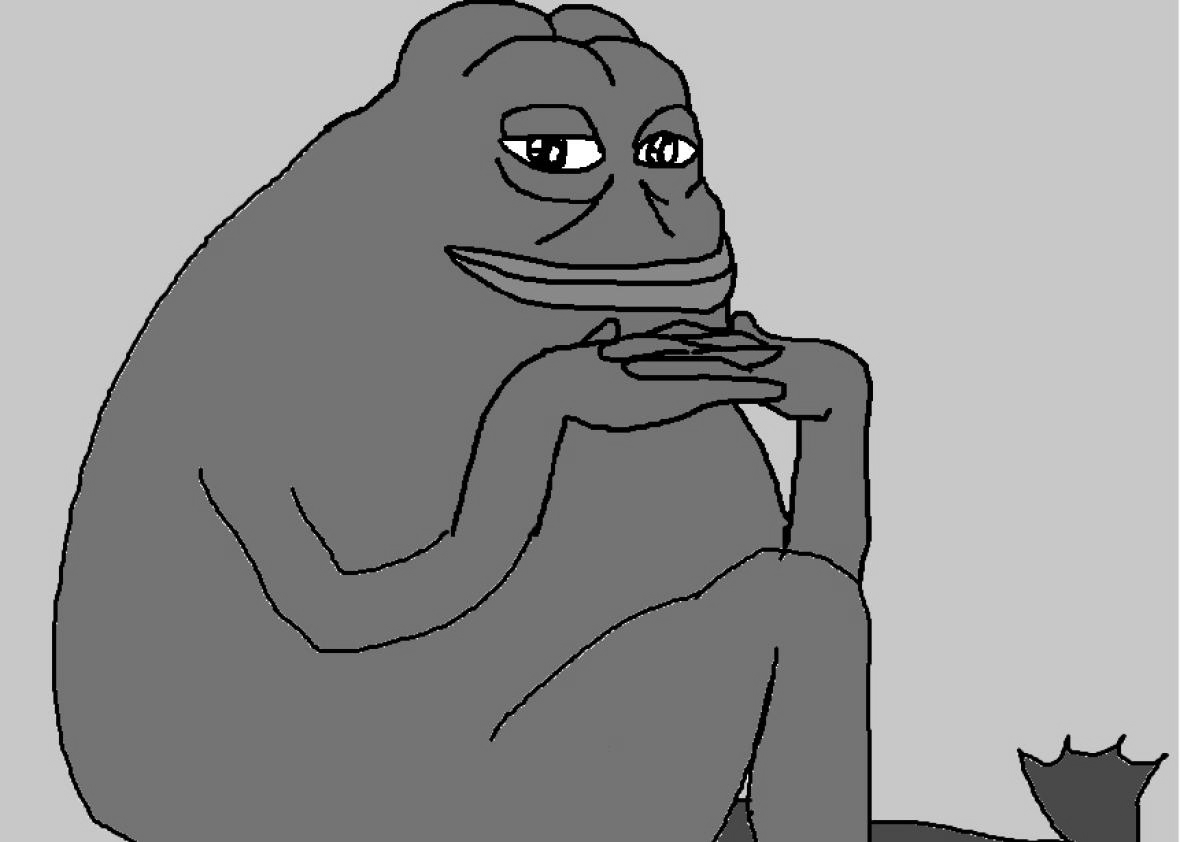

In [7]:
from PIL import Image

def img_to_data(path):
    """Load image from path as numpy matrix"""
    return np.array(Image.open(path))

def data_to_img(data):
    """Convert numpy matrix back to image"""
    return Image.fromarray(data, 'LA')

B = img_to_data('res/pepe.png')
data_to_img(B)

In [8]:
# This image can be compressed using rank-k approximation
a = B[:, 0]
a

array([[200, 255],
       [200, 255],
       [200, 255],
       ...,
       [200, 255],
       [200, 255],
       [200, 255]], dtype=uint8)

## 3. Orthonormality

A set of vectors are said to be mutually orthonormal if they are all mutually orthogonal and all of unit length.

### 3.1 Orthonormal Vectors

Let $q_0, \ldots, q_{k-1} \in \mathbb{R}^m$ are said to be orthonormal if for all $0 \leq i,j \lt k:$

$$q_i^Tq_j = \begin{cases}
1 &\text{if $i = j$}\\
0 &\text{otherwise}
\end{cases}$$

### 3.2 Orthonormal Matrix

Let $Q=
\begin{pmatrix}
q_0 \mid \ldots \mid q_{k-1} \\
\end{pmatrix}
$
, then the matrix is orthonormal. This matrix has some special properties:
- $Q^T=Q^{-1}$
- $Q^TQ=I$
- $QQ^T=I$
- $QQ^T$ is the matrix that projects vectors onto $\mathcal{C}(Q)$  
because $Q(Q^TQ)^{-1}Q^T \Rightarrow QI^{-1}Q^T \Rightarrow QQ^T$
- $I-QQ^T$ is the matrix that projects vectors onto $\mathcal{C}(Q)^\perp$  
because $I-Q(Q^TQ)^{-1}Q^T \Rightarrow I-QI^{-1}Q^T \Rightarrow I-QQ^T$

### 3.3 Gram-Schmidt Process

This process is used to orthonormalising a set of vectors. Orthogonalizing three given vectors:

$ a_0 =
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
$, $ a_1 =
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
$, $ a_2 =
\begin{pmatrix}
-1\\
-2\\
2
\end{pmatrix}
$

Finding orthonormal $q_0, q_1,$ and $q_2$, such that $span(\{q_0, q_1, q_2\}) = span(\{a_0, a_1, a_2\})$.

**Step 1:** Normalize the length of vector $a_0$, dividing $a_0$ by its own length

- $\rho_{0,0} = \|a_0\|_2$
- $q_0 = a_0 / \|a_0\|_2$

$\rho_{0,0} =
\begin{Vmatrix}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
\end{Vmatrix}_2$
$=\sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$

$
q_0 =
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix} / \sqrt{3}
$
$ = \frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
$

**Step 2:** We will compute $q_1$ to be orthogonal to $q_0$. 

- $\rho_{0,1} = q_0^Ta_1$
- $a_1^\perp = a_1 - q_0^Ta_1q_0$

$\rho_{0,1}=\frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}^T
$
$
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
$
$=6\frac{\sqrt{3}}{3}=2\sqrt{3}$

$a_1^\perp = 
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
$ $-2\sqrt{3}\frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
$ $=
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}
$

Now we have two vectors, $q_0$ and $a_1^\perp$ that are orthogonal to eachother, but $a_1^\perp$ is not of length 1. So we repeat step one for $q_1$:

- $\rho_{1,1} = \|a_1^\perp\|_2$
- $q_1 = a_1^\perp / \|a_1^\perp\|_2$

$\rho_{1,1} =
\begin{Vmatrix}
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}
\end{Vmatrix}_2$
$=\sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{2}$

$
q_1 =
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix} / \sqrt{2}
$
$ = \frac{\sqrt{2}}{2}
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}
$

![](https://notebooks.azure.com/menziess/libraries/Python-Linear-Algebra/raw/res%2FGram-Schmidt.gif)

$Q^{(2)} = 
\begin{pmatrix}
q_0 \mid q_1
\end{pmatrix}$
$=
\begin{pmatrix}
\frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
\mid
\frac{\sqrt{2}}{2}
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}
\end{pmatrix}
$

Now finally, we want to project the final vector $a_2$ onto the column space of $Q$. Then $a_2$ is comprised of the projection $z$ and another vector $w$. We can subtract out $w$, or let's call it $a_2^\perp$, that is perpendicular to both $q_0$ and $q_1$.

- $
\begin{pmatrix}
\rho_{0,2}\\
\rho_{1,2}
\end{pmatrix}
=Q^{(2)^T}a_2$
- $a_2^\perp = a_2 - Q^{(2)} Q^{(2)^T} a_2$

$\rho_{0,2}= \frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}^T
$ $=
\begin{pmatrix}
-1\\
-2\\
2
\end{pmatrix}
=-\frac{\sqrt{3}}{3}$

$\rho_{1,2}= \frac{\sqrt{2}}{2}
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}^T
$ $=
\begin{pmatrix}
-1\\
-2\\
2
\end{pmatrix}
=\frac{3\sqrt{2}}{2}$

$a_2^\perp =
\begin{pmatrix}
-1\\
-2\\
2
\end{pmatrix}
$ $-\frac{-\sqrt{3}}{3}\frac{\sqrt{3}}{3}
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
$ $-\frac{3\sqrt{2}}{2}\frac{\sqrt{2}}{2}
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix}
$ 

$=
\begin{pmatrix}
-1\\
-2\\
2
\end{pmatrix}
$ $-
\begin{pmatrix}
-1/3\\
-1/3\\
-1/3
\end{pmatrix}
$ $-
\begin{pmatrix}
-3/2\\
0\\
3/2
\end{pmatrix}
$ 

$=
\begin{pmatrix}
5/6\\
-5/3\\
5/6
\end{pmatrix}
$

Now we have three vectors that are mutually orthogonal. But the last vector has to be made of length 1. We repeat step 1 once more for $a_2^\perp$:

- $\rho_{2,2} = \|a_2^\perp\|_2$
- $q_2 = a_2^\perp / \|a_2^\perp\|_2$

$\rho_{2,2} =
\begin{Vmatrix}
\begin{pmatrix}
5/6\\
-5/3\\
5/6
\end{pmatrix}
\end{Vmatrix}_2$
$=\sqrt{5/6^2 + (-5/3)^2 + 5/6^2} = \ldots$

$q_2 =\ldots$

### 4. QR-Factorization

This knowledge can be utilized as an algorithm in terms of a factorization. As with LU-Factorization, we can decompose a matrix $A$ into the product $A=QR$, where $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix.

The Gram-Schmidt proces computes $A=QR$, where $\rho_{i,j}$ is stored in matrix $R$. And $q_0, \ldots, q_{k-1}$ are stored in $Q$.

Let $A=
\begin{pmatrix}
1 & 0\\
0 & 1\\
1 & 1\\
\end{pmatrix}$, compute the QR factorization of this matrix.

- $A=QR$

- $A =
\begin{pmatrix}
a_0 & a_1
\end{pmatrix}$
$=
\begin{pmatrix}
q_0 & q_1
\end{pmatrix}
$
$
\begin{pmatrix}
\rho_{0,0} & \rho_{0,1}\\
0 & \rho_{1,1}
\end{pmatrix}
=QR$

- $
\begin{pmatrix}
1 & 0\\
0 & 1\\
1 & 1\\
\end{pmatrix}$
$ =\left[ \begin{array}{c|c} 
\frac{1}{\sqrt{2}}  
\begin{pmatrix}
1 \\
0 \\
1
\end{pmatrix}& \ldots
\end{array} \right]$
$ \left[ \begin{array}{c|c} 
\sqrt{2} & \ldots \\
\hline
0 & \ddots
\end{array} \right]$

- $
\begin{pmatrix}
1 & 0\\
0 & 1\\
1 & 1\\
\end{pmatrix}$
$ =\left[ \begin{array}{c|c} 
\frac{1}{\sqrt{2}}  
\begin{pmatrix}
1 \\
0 \\
1
\end{pmatrix}&
\frac{\sqrt{2}}{\sqrt{3}}
\begin{pmatrix}
-\frac{1}{2}\\
1\\
\frac{1}{2}
\end{pmatrix}
\end{array} \right]$
$ \left[ \begin{array}{c|c} 
\sqrt{2} & \frac{1}{\sqrt{2}} \\
\hline
0 & \frac{\sqrt{3}}{\sqrt{2}}
\end{array} \right]$

### 4.1 Solving Linear Least-Squares Via QR-Factorization

$Ax\approx b$

- Factor: $A=QR$ where $Q^TQ=I$ and $R$ is upper triangular
- Solve $Rx=Q^Tb$
- Columns of $A$ must be linearly independent

## 5. Singular Value Decomposition

Let $B\in \mathbb{R}^{m\times n}$, then:

$$B=U\Sigma V^T$$

When:
- $U\in \mathbb{R}^{m\times n}$ and $U^TU=I$
- $\Sigma \in \mathbb{R}^{r\times r}$ is a diagonal matrix with positive diagonal elements that are ordered so that $\sigma_0 \geq \sigma_1 \geq \ldots \geq \sigma_{r-1} \gt 0$
- $V\in \mathbb{R}^{n\times r}$ and $V^TV=I$
- $r$ equals the rank of matrix $B$

If we partition:

$U =
\begin{pmatrix}
U_L \mid U_R
\end{pmatrix}
$, $ V=
\begin{pmatrix}
V_L \mid V_R
\end{pmatrix}
$, and $\Sigma=
\left[ \begin{array}{c|c} 
\Sigma_{TL} & 0 \\
\hline
0 & \Sigma_{BR}
\end{array} \right]$

where $U_L$ and $V_L$ have $k$ columns and $\Sigma_{TL}$ is $k \times k$, then $U_L\Sigma_{TL}V_L^T$ is the "best" rank-k approximation to matrix $B$. So, the "best" rank-k approximation $B=AW^T$ is given by choices $A=U_L$ and $W=\Sigma_{TL}V_L$.

Given $A \in \mathbb{R}^{m\times n}$ with linearly independent columns, and $b \in \mathbb{R}^m$, the "best" solution to $Ax\approx b$ (in the linear least-squares sense) via its SVD, $A = U\Sigma V^T$, is given by:
- $\hat{x}=V\Sigma^{-1}U^Tb$

Also:
- $\mathcal{C}(B) = \mathcal{C}(U)$
- $\mathcal{R}(B) = \mathcal{C}(V)$